# Characterize DE mRNAs and lncRNAs gene expression patterns

## <br> 1. Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec
from matplotlib_venn import venn2
from sklearn.cluster import KMeans


In [2]:
import os

# Directory name
figures_dir = "Figures"

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print(f"Directory '{figures_dir}' created.")
else:
    print(f"Directory '{figures_dir}' already exists.")


Directory 'Figures' already exists.


## <br> 2. Import Data

In [3]:
Mouse_Master = pd.read_csv('../02_Mouse_Bulk_RNAseq/04_Deseq2/RDDR_Deseq2_Master_Wald_Bulk_Mouse_with_Mouse_MGI.txt',
                                              delimiter = '\t',
                                              index_col=0)



Mouse_Master['Dose'] = Mouse_Master['Dose'].apply(lambda x: '{:.2g}'.format(x)).astype('category')

# Specify the desired order for the Dose levels
dose_order = ['0.03', '0.1', '0.3', '1', '3', '10', '30']

# Convert 'Dose' column to a categorical type with the specified order
Mouse_Master['Dose'] = pd.Categorical(Mouse_Master['Dose'], categories=dose_order, ordered=True)

Mouse_Master

/tmp/local/51388227/ipykernel_2225564/1610497500.py:1: DtypeWarning: Columns (18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  Mouse_Master = pd.read_csv('../02_Mouse_Bulk_RNAseq/04_Deseq2/RDDR_Deseq2_Master_Wald_Bulk_Mouse_with_Mouse_MGI.txt',


,Gene,MGI_Symbol,Dose,pDRE,AHR,Type,baseMean,Log2FC,Fold-Change,lfcSE,...,padj,chrom,start,end,frame,score,strand,gene_id,transcript_id,NR_annotation
0,lnc100,.,0.03,1,0,lncRNA,0.738981,0.862954,1.818759,2.429333,...,NaN,chr1,21246734,21250265,.,1000,+,lnc_inter_chr1_100,lnc_inter_chr1_100,lnc100
1,lnc1000,Gm32128,0.03,0,8,lncRNA,0.821042,0.929693,1.904871,1.989028,...,NaN,chr1,191152395,191156841,.,1000,+,lnc_inter_chr1_1000,lnc_inter_chr1_1000,lnc1000
2,lnc10003,Gm51875,0.03,0,0,lncRNA,0.300701,0.000000,1.000000,5.656128,...,NaN,chr11,94897782,94903363,.,1000,-,lnc_as_chr11_10003,lnc_as_chr11_10003,lnc10003
3,lnc10003,Gm36385,0.03,0,0,lncRNA,0.300701,0.000000,1.000000,5.656128,...,NaN,chr11,94897782,94903363,.,1000,-,lnc_as_chr11_10003,lnc_as_chr11_10003,lnc10003
4,lnc10004,Dlx4os,0.03,1,0,lncRNA,2.027109,0.000000,1.000000,1.904898,...,1.000000e+00,chr11,95035841,95050060,.,1000,+,lnc_as_chr11_10004,lnc_as_chr11_10004,lnc10004_Dlx4os
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365969,mt-Nd4l,.,30,0,0,mitochondrial protein-coding gene,28.894681,-0.353649,0.782602,0.350916,...,4.619477e-01,chrM,9876,10173,.,.,+,ENSMUSG00000065947,ENSMUSG00000065947,NaN
365970,mt-Nd4,.,30,0,0,mitochondrial protein-coding gene,98368.928940,-0.549831,0.683100,0.082421,...,2.695554e-10,chrM,10166,11544,.,.,+,ENSMUSG00000064363,ENSMUSG00000064363,NaN
365971,mt-Nd5,.,30,0,0,mitochondrial protein-coding gene,67723.157378,-0.101532,0.932043,0.100825,...,4.622247e-01,chrM,11741,13565,.,.,+,ENSMUSG00000064367,ENSMUSG00000064367,NaN
365972,mt-Nd6,.,30,0,0,mitochondrial protein-coding gene,19830.183491,0.154663,1.113162,0.185883,...,5.561182e-01,chrM,13551,14070,.,.,-,ENSMUSG00000064368,ENSMUSG00000064368,NaN


In [4]:
Rat_Master = pd.read_csv('../03_Rat_Bulk_RNAseq/04_Deseq2/RDDR_Deseq2_Master_Wald_Rat_with_Mouse_MGI.txt',
                                              delimiter = '\t',
                                              index_col=0)

Rat_Master['Dose'] = Rat_Master['Dose'].apply(lambda x: '{:.2g}'.format(x)).astype('category')

# Specify the desired order for the Dose levels
dose_order = ['0.01','0.03', '0.1', '0.3', '1', '3', '10']

# Convert 'Dose' column to a categorical type with the specified order
Rat_Master['Dose'] = pd.Categorical(Rat_Master['Dose'], categories=dose_order, ordered=True)

Rat_Master

,Gene,Dose,pDRE,AHR,transcript_type,baseMean,Log2FC,Fold-Change,lfcSE,stat,pvalue,padj,source
0,lnc1000,0.01,0,1,lncRNA,1.021823,-0.020692,0.985760,1.991121,-0.010392,9.917083e-01,NaN,liftover
1,lnc10000,0.01,1,0,lncRNA,0.046372,-0.929325,0.525104,6.005823,-0.154737,8.770284e-01,NaN,liftover
2,lnc10001,0.01,0,0,lncRNA,0.146825,0.000000,1.000000,6.005823,0.000000,1.000000e+00,NaN,liftover
3,lnc10003,0.01,2,0,lncRNA,0.177874,0.032402,1.022714,6.005823,0.005395,9.956953e-01,NaN,liftover
4,lnc10004,0.01,7,1,lncRNA,0.740087,0.000000,1.000000,3.592880,0.000000,1.000000e+00,NaN,liftover
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722234,LOC120099597,10,1,0,predicted_lncRNA,0.092333,-1.398142,0.379417,6.005823,-0.232798,8.159184e-01,NaN,ncbiRefSeq
7722237,Dkc1,10,0,2,mRNA,277.395024,1.901728,3.736606,0.248099,7.665213,1.785343e-14,1.705286e-12,ncbiRefSeq
7722252,LOC103694537,10,0,0,predicted_mRNA,17.353741,0.172073,1.126676,0.466195,0.369101,7.120523e-01,8.501281e-01,ncbiRefSeq
7722264,LOC120099632,10,0,0,predicted_mRNA,0.048942,0.000000,1.000000,6.005823,0.000000,1.000000e+00,NaN,ncbiRefSeq


## <br> 3a. Determine DE lncRNAs in Mouse vs Rat Bulk RNAseq

In [5]:
Mouse_Master_lncRNA = Mouse_Master[(Mouse_Master['Type']== 'lncRNA') |
                                     (Mouse_Master['Type']== 'antisense') |
                                     (Mouse_Master['Type']== 'lincRNA') |
                                     (Mouse_Master['Type']== 'NR') |
                                     (Mouse_Master['Type']== 'lncOfInterest')]

Mouse_Master_lncRNA_DEGs = Mouse_Master_lncRNA[((Mouse_Master_lncRNA['Fold-Change'] >= 1.5) | 
                                                 (Mouse_Master_lncRNA['Fold-Change'] <= 1/1.5)) &
                                                 (Mouse_Master_lncRNA['padj'] <= 0.05)]

In [6]:
Rat_Master_lncRNA = Rat_Master[(Rat_Master['transcript_type']== 'lncRNA')]

Rat_Master_lncRNA_DEGs = Rat_Master_lncRNA[((Rat_Master_lncRNA['Fold-Change'] >= 1.5) | 
                                                 (Rat_Master_lncRNA['Fold-Change'] <= 1/1.5)) &
                                                 (Rat_Master_lncRNA['padj'] <= 0.05)]

In [7]:
# Prepare the data
Mouse_lncRNA_DEGs_List = Mouse_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first')
Rat_lncRNA_DEGs_List = Rat_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first')

# Convert to sets
Mouse_set = set(Mouse_lncRNA_DEGs_List)
Rat_set = set(Rat_lncRNA_DEGs_List)

# Find the intersection (common genes) between Mouse and Rat sets
common_genes = Mouse_set.intersection(Rat_set)

# Convert to a list (if needed)
common_genes_list = list(common_genes) 
print("Common DE lncRNAs:",len(common_genes_list))

Genes_to_Keep_List = pd.DataFrame(common_genes_list, columns=['Gene'])
rat_common_genes_df = Rat_Master[Rat_Master['Gene'].isin(common_genes)]
mouse_common_genes_df = Mouse_Master[Mouse_Master['Gene'].isin(common_genes)]


Common DE lncRNAs: 203


## <br> 3b. Rat K-Means Clustering 

In [8]:
# Number of clusters
num_clusters = 5  # Adjust this number as needed

In [9]:
# Define 6 different colors
colors = ['red','orange', 'green', 'blue',  'purple']
custom_cmap = ListedColormap(colors)

# Define the blue, white, and red colormap
colors = ["#0000FF", "#FFFFFF", "#FF0000"]
blue_white_red = LinearSegmentedColormap.from_list("BlueWhiteRed", colors)

In [10]:
# Extract relevant columns for further analysis
Data_Filtered = rat_common_genes_df[['Gene', 'Dose', 'Log2FC']].drop_duplicates(keep='first')

# Pivot the DataFrame to arrange log2FoldChange values by Gene and Time
pivot_df = Data_Filtered.pivot(index='Gene', columns='Dose', values='Log2FC')

# Reset the index if needed
pivot_df.reset_index(inplace=True)

# Merge DEGs with log2FoldChange values
merged_df = pd.merge(Genes_to_Keep_List, pivot_df, on='Gene', how='left')

# Set 'Gene' column as index
merged_df.set_index('Gene', inplace=True)

# Convert the DataFrame to a NumPy array for clustering
pivot_array = merged_df.values

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=827)

numeric_data = pivot_array[:, 1:].astype(float)

# Fit KMeans to the data
kmeans.fit(numeric_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Convert column names to string
merged_df.columns = merged_df.columns.astype(str)

# Assign cluster labels to the DataFrame
merged_df['Cluster'] = kmeans.labels_

# Sort the DataFrame by cluster
merged_df_sorted = merged_df.sort_values(by='Cluster')

# Calculate the mean values for each time point within each cluster
cluster_means = merged_df.groupby('Cluster')[['0.01','0.03', '0.1', '0.3', '1', '3', '10']].mean()
cluster_means

# Select specific columns for selected_df
selected_columns = ['0.01','0.03', '0.1', '0.3', '1', '3', '10']
selected_df = merged_df_sorted[selected_columns]

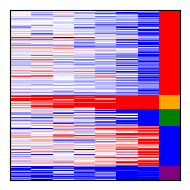

In [11]:
# Create the figure
fig = plt.figure(figsize=(2, 2))

# Create the outer GridSpec
outer = gridspec.GridSpec(1, 2, width_ratios=[7, 1], wspace=0.0)

# Create inner GridSpec for the first subplot (selected_df)
inner1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0], width_ratios=[7], wspace=0)

# Create inner GridSpec for the second subplot (cluster_df)
inner2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[1], width_ratios=[1], wspace=0)

# Create the heatmap for selected_df
ax1 = fig.add_subplot(inner1[0])
sns.heatmap(selected_df, cmap=blue_white_red, 
            linewidths=0, linecolor='black', 
            vmin=-2, vmax=2, cbar=False, ax=ax1)

# Remove tick marks and y-ticks
ax1.set_xticks([])
ax1.set_xlabel('')
ax1.set_yticks([])
ax1.set_ylabel('')

for loc, spine in ax1.spines.items():
    if loc != 'right':
        spine.set_visible(True)
    else:
        spine.set_visible(False)

# Select specific columns for cluster_df
cluster_df = merged_df_sorted[['Cluster']]

# Create the heatmap for cluster_df
ax2 = fig.add_subplot(inner2[0])
sns.heatmap(cluster_df, cmap=custom_cmap, 
            linewidths=0, linecolor='black', 
            vmin=cluster_df.min().min(), vmax=cluster_df.max().max(), cbar=False, ax=ax2)
ax2.set_xticks([])
ax2.set_xlabel('')
ax2.set_yticks([])
ax2.set_ylabel('')

for loc, spine in ax2.spines.items():
    if loc != 'left':
        spine.set_visible(True)
    else:
        spine.set_visible(False)

# Adjust layout
plt.tight_layout()

# Export the plot as a PDF
plt.savefig('Figures/Small_Heatmap_by_Cluster_Common_DE_lncRNAs_Rat.pdf')

# Show the plot
plt.show()


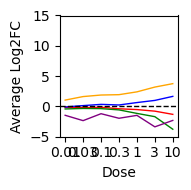

In [12]:
# Set the size of the figure and legend font size
plt.figure(figsize=(2, 2))

# Iterate over each cluster
for i, cluster in enumerate(cluster_means.index):
    # Get the mean values for the current cluster
    cluster_data = cluster_means.loc[cluster]
    
    # Plot a line graph for the current cluster with the custom color
    plt.plot(cluster_data.index.astype(str), cluster_data.values,
             label=f'Cluster {cluster}', color=custom_cmap(i), linewidth=1.0)
    
# Add labels and title
plt.xlabel('Dose')
plt.ylabel('Average Log2FC')


# Additional formatting
plt.grid(False)  # Remove gridlines
plt.ylim(-5, 15)
plt.yticks([-5,-0,5,10, 15])
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.0)

# Adjust layout
plt.tight_layout()

# Export the plot as a PDF
plt.savefig('Figures/Small_RDDR_Cluster_Means_Line_Plot_DE_lncRNAs_Rat.pdf')

# Show the plot
plt.show()


## <br> 3c. Mouse K-Means Clustering 

In [13]:
# Extract relevant columns for further analysis
Data_Filtered = mouse_common_genes_df[['Gene', 'Dose', 'Log2FC']].drop_duplicates(keep='first')

# Pivot the DataFrame to arrange log2FoldChange values by Gene and Time
pivot_df = Data_Filtered.pivot(index='Gene', columns='Dose', values='Log2FC')

# Reset the index if needed
pivot_df.reset_index(inplace=True)

# Merge DEGs with log2FoldChange values
merged_df = pd.merge(Genes_to_Keep_List, pivot_df, on='Gene', how='left')

# Set 'Gene' column as index
merged_df.set_index('Gene', inplace=True)

# Convert the DataFrame to a NumPy array for clustering
pivot_array = merged_df.values

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=827)

numeric_data = pivot_array[:, 1:].astype(float)

# Fit KMeans to the data
kmeans.fit(numeric_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Convert column names to string
merged_df.columns = merged_df.columns.astype(str)

# Assign cluster labels to the DataFrame
merged_df['Cluster'] = kmeans.labels_

# Sort the DataFrame by cluster
merged_df_sorted = merged_df.sort_values(by='Cluster')

# Calculate the mean values for each time point within each cluster
cluster_means = merged_df.groupby('Cluster')[['0.03', '0.1', '0.3', '1', '3', '10', '30']].mean()
cluster_means

# Select specific columns for selected_df
selected_columns = ['0.03', '0.1', '0.3', '1', '3', '10', '30']
selected_df = merged_df_sorted[selected_columns]

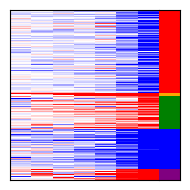

In [14]:
# Create the figure
fig = plt.figure(figsize=(2, 2))

# Create the outer GridSpec
outer = gridspec.GridSpec(1, 2, width_ratios=[7, 1], wspace=0.0)

# Create inner GridSpec for the first subplot (selected_df)
inner1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0], width_ratios=[7], wspace=0)

# Create inner GridSpec for the second subplot (cluster_df)
inner2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[1], width_ratios=[1], wspace=0)

# Create the heatmap for selected_df
ax1 = fig.add_subplot(inner1[0])
sns.heatmap(selected_df, cmap=blue_white_red, 
            linewidths=0, linecolor='black', 
            vmin=-2, vmax=2, cbar=False, ax=ax1)

ax1.set_xticks([])
ax1.set_xlabel('')
ax1.set_yticks([])
ax1.set_ylabel('')

for loc, spine in ax1.spines.items():
    if loc != 'right':
        spine.set_visible(True)
    else:
        spine.set_visible(False)

# Select specific columns for cluster_df
cluster_df = merged_df_sorted[['Cluster']]

# Create the heatmap for cluster_df
ax2 = fig.add_subplot(inner2[0])
sns.heatmap(cluster_df, cmap=custom_cmap, 
            linewidths=0, linecolor='black', 
            vmin=cluster_df.min().min(), vmax=cluster_df.max().max(), cbar=False, ax=ax2)

ax2.set_xticks([])
ax2.set_xlabel('')
ax2.set_yticks([])
ax2.set_ylabel('')

for loc, spine in ax2.spines.items():
    if loc != 'left':
        spine.set_visible(True)
    else:
        spine.set_visible(False)

# Adjust layout
plt.tight_layout()

# Export the plot as a PDF
plt.savefig('Figures/Small_Heatmap_by_Cluster_Common_DE_lncRNAs_Mouse.pdf')

# Show plot
plt.show()



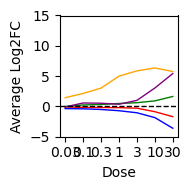

In [15]:
# Set the size of the figure and legend font size
plt.figure(figsize=(2, 2))

# Iterate over each cluster
for i, cluster in enumerate(cluster_means.index):
    # Get the mean values for the current cluster
    cluster_data = cluster_means.loc[cluster]
    
    # Plot a line graph for the current cluster with the custom color
    plt.plot(cluster_data.index.astype(str), cluster_data.values,
             label=f'Cluster {cluster}', color=custom_cmap(i), linewidth=1.0)
    
# Add labels and title
plt.xlabel('Dose')
plt.ylabel('Average Log2FC')
#plt.title('Average Values for Each Time Point by Cluster')
#plt.legend()
plt.grid(False)  # Remove gridlines
plt.ylim(-5, 15)
plt.yticks([-5,-0,5,10, 15])
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.0)


# Adjust layout
plt.tight_layout()

# Export the plot as a PDF
plt.savefig('Figures/Small_RDDR_Cluster_Means_Line_Plot_DE_lncRNAs_Mouse.pdf')

# Show the plot
plt.show()


## <br> 4a. Determine DE mRNAs in Mouse vs Rat Bulk RNAseq

In [16]:
Mouse_Master_mRNA = Mouse_Master[(Mouse_Master['Type'] == 'NM') |
                                    (Mouse_Master['Type'] == 'NM#NR')|
                                    (Mouse_Master['Type'] == 'mitochondrial protein-coding gene')]

Mouse_Master_mRNA_DEGs = Mouse_Master_mRNA[((Mouse_Master_mRNA['Fold-Change'] >= 1.5) | 
                                              (Mouse_Master_mRNA['Fold-Change'] <= 1/1.5)) &
                                              (Mouse_Master_mRNA['padj'] <= 0.05)]


In [17]:
Rat_Master_mRNA = Rat_Master[(Rat_Master['transcript_type']== 'mRNA')]

Rat_Master_mRNA_DEGs = Rat_Master_mRNA[((Rat_Master_mRNA['Fold-Change'] >= 1.5) | 
                                                 (Rat_Master_mRNA['Fold-Change'] <= 1/1.5)) &
                                                 (Rat_Master_mRNA['padj'] <= 0.05)]

In [18]:
# Prepare the data
Mouse_mRNA_DEGs_List = Mouse_Master_mRNA_DEGs['Gene'].drop_duplicates(keep='first')
Rat_mRNA_DEGs_List = Rat_Master_mRNA_DEGs['Gene'].drop_duplicates(keep='first')

# Convert to sets
Mouse_set = set(Mouse_mRNA_DEGs_List)
Rat_set = set(Rat_mRNA_DEGs_List)

# Find the intersection (common genes) between Mouse and Rat sets
common_genes = Mouse_set.intersection(Rat_set)

# Convert to a list (if needed)
common_genes_list = list(common_genes) 
print("Common DE mRNAs:",len(common_genes_list))

Genes_to_Keep_List = pd.DataFrame(common_genes_list, columns=['Gene'])
rat_common_genes_df = Rat_Master[Rat_Master['Gene'].isin(common_genes)]
mouse_common_genes_df = Mouse_Master[Mouse_Master['Gene'].isin(common_genes)]


Common DE mRNAs: 1492


## <br> 3b. Rat K-Means Clustering 

In [19]:
# Number of clusters
num_clusters = 5  # Adjust this number as needed

In [20]:
# Define 6 different colors
colors = ['red','orange', 'green', 'blue',  'purple']
custom_cmap = ListedColormap(colors)

# Define the blue, white, and red colormap
colors = ["#0000FF", "#FFFFFF", "#FF0000"]
blue_white_red = LinearSegmentedColormap.from_list("BlueWhiteRed", colors)

In [21]:
# Extract relevant columns for further analysis
Data_Filtered = rat_common_genes_df[['Gene', 'Dose', 'Log2FC']].drop_duplicates(keep='first')

# Pivot the DataFrame to arrange log2FoldChange values by Gene and Time
pivot_df = Data_Filtered.pivot(index='Gene', columns='Dose', values='Log2FC')

# Reset the index if needed
pivot_df.reset_index(inplace=True)

# Merge DEGs with log2FoldChange values
merged_df = pd.merge(Genes_to_Keep_List, pivot_df, on='Gene', how='left')

# Set 'Gene' column as index
merged_df.set_index('Gene', inplace=True)

# Convert the DataFrame to a NumPy array for clustering
pivot_array = merged_df.values

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=827)

numeric_data = pivot_array[:, 1:].astype(float)

# Fit KMeans to the data
kmeans.fit(numeric_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Convert column names to string
merged_df.columns = merged_df.columns.astype(str)

# Assign cluster labels to the DataFrame
merged_df['Cluster'] = kmeans.labels_

# Sort the DataFrame by cluster
merged_df_sorted = merged_df.sort_values(by='Cluster')

# Calculate the mean values for each time point within each cluster
cluster_means = merged_df.groupby('Cluster')[['0.01','0.03', '0.1', '0.3', '1', '3', '10']].mean()
cluster_means

# Select specific columns for selected_df
selected_columns = ['0.01','0.03', '0.1', '0.3', '1', '3', '10']
selected_df = merged_df_sorted[selected_columns]

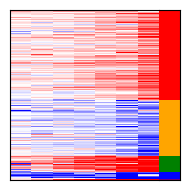

In [22]:
# Create the figure
fig = plt.figure(figsize=(2, 2))

# Create the outer GridSpec
outer = gridspec.GridSpec(1, 2, width_ratios=[7, 1], wspace=0.0)

# Create inner GridSpec for the first subplot (selected_df)
inner1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0], width_ratios=[7], wspace=0)

# Create inner GridSpec for the second subplot (cluster_df)
inner2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[1], width_ratios=[1], wspace=0)

# Create the heatmap for selected_df
ax1 = fig.add_subplot(inner1[0])
sns.heatmap(selected_df, cmap=blue_white_red, 
            linewidths=0, linecolor='black', 
            vmin=-2, vmax=2, cbar=False, ax=ax1)

# Remove tick marks and y-ticks
ax1.set_xticks([])
ax1.set_xlabel('')
ax1.set_yticks([])
ax1.set_ylabel('')

for loc, spine in ax1.spines.items():
    if loc != 'right':
        spine.set_visible(True)
    else:
        spine.set_visible(False)

# Select specific columns for cluster_df
cluster_df = merged_df_sorted[['Cluster']]

# Create the heatmap for cluster_df
ax2 = fig.add_subplot(inner2[0])
sns.heatmap(cluster_df, cmap=custom_cmap, 
            linewidths=0, linecolor='black', 
            vmin=cluster_df.min().min(), vmax=cluster_df.max().max(), cbar=False, ax=ax2)
ax2.set_xticks([])
ax2.set_xlabel('')
ax2.set_yticks([])
ax2.set_ylabel('')

for loc, spine in ax2.spines.items():
    if loc != 'left':
        spine.set_visible(True)
    else:
        spine.set_visible(False)

# Adjust layout
plt.tight_layout()

# Export the plot as a PDF
plt.savefig('Figures/Small_Heatmap_by_Cluster_Common_DE_mRNAs_Rat.pdf')

# Show the plot
plt.show()


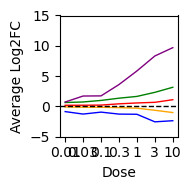

In [23]:
# Set the size of the figure and legend font size
plt.figure(figsize=(2, 2))

# Iterate over each cluster
for i, cluster in enumerate(cluster_means.index):
    # Get the mean values for the current cluster
    cluster_data = cluster_means.loc[cluster]
    
    # Plot a line graph for the current cluster with the custom color
    plt.plot(cluster_data.index.astype(str), cluster_data.values,
             label=f'Cluster {cluster}', color=custom_cmap(i), linewidth=1.0)
    
# Add labels and title
plt.xlabel('Dose')
plt.ylabel('Average Log2FC')

# Additional formatting
plt.grid(False)  # Remove gridlines
plt.ylim(-5, 15)
plt.yticks([-5,-0,5,10, 15])
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.0)

# Adjust layout
plt.tight_layout()

# Export the plot as a PDF
plt.savefig('Figures/Small_RDDR_Cluster_Means_Line_Plot_DE_mRNAs_Rat.pdf')

# Show the plot
plt.show()


## <br> 3c. Mouse K-Means Clustering 

In [24]:
# Extract relevant columns for further analysis
Data_Filtered = mouse_common_genes_df[['Gene', 'Dose', 'Log2FC']].drop_duplicates(keep='first')

# Pivot the DataFrame to arrange log2FoldChange values by Gene and Time
pivot_df = Data_Filtered.pivot(index='Gene', columns='Dose', values='Log2FC')

# Reset the index if needed
pivot_df.reset_index(inplace=True)

# Merge DEGs with log2FoldChange values
merged_df = pd.merge(Genes_to_Keep_List, pivot_df, on='Gene', how='left')

# Set 'Gene' column as index
merged_df.set_index('Gene', inplace=True)

# Convert the DataFrame to a NumPy array for clustering
pivot_array = merged_df.values

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=827)

numeric_data = pivot_array[:, 1:].astype(float)

# Fit KMeans to the data
kmeans.fit(numeric_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Convert column names to string
merged_df.columns = merged_df.columns.astype(str)

# Assign cluster labels to the DataFrame
merged_df['Cluster'] = kmeans.labels_

# Sort the DataFrame by cluster
merged_df_sorted = merged_df.sort_values(by='Cluster')

# Calculate the mean values for each time point within each cluster
cluster_means = merged_df.groupby('Cluster')[['0.03', '0.1', '0.3', '1', '3', '10', '30']].mean()
cluster_means

# Select specific columns for selected_df
selected_columns = ['0.03', '0.1', '0.3', '1', '3', '10', '30']
selected_df = merged_df_sorted[selected_columns]

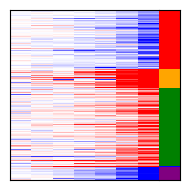

In [25]:
# Create the figure
fig = plt.figure(figsize=(2, 2))

# Create the outer GridSpec
outer = gridspec.GridSpec(1, 2, width_ratios=[7, 1], wspace=0.0)

# Create inner GridSpec for the first subplot (selected_df)
inner1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0], width_ratios=[7], wspace=0)

# Create inner GridSpec for the second subplot (cluster_df)
inner2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[1], width_ratios=[1], wspace=0)

# Create the heatmap for selected_df
ax1 = fig.add_subplot(inner1[0])
sns.heatmap(selected_df, cmap=blue_white_red, 
            linewidths=0, linecolor='black', 
            vmin=-2, vmax=2, cbar=False, ax=ax1)

ax1.set_xticks([])
ax1.set_xlabel('')
ax1.set_yticks([])
ax1.set_ylabel('')

for loc, spine in ax1.spines.items():
    if loc != 'right':
        spine.set_visible(True)
    else:
        spine.set_visible(False)

# Select specific columns for cluster_df
cluster_df = merged_df_sorted[['Cluster']]

# Create the heatmap for cluster_df
ax2 = fig.add_subplot(inner2[0])
sns.heatmap(cluster_df, cmap=custom_cmap, 
            linewidths=0, linecolor='black', 
            vmin=cluster_df.min().min(), vmax=cluster_df.max().max(), cbar=False, ax=ax2)

ax2.set_xticks([])
ax2.set_xlabel('')
ax2.set_yticks([])
ax2.set_ylabel('')

for loc, spine in ax2.spines.items():
    if loc != 'left':
        spine.set_visible(True)
    else:
        spine.set_visible(False)

# Adjust layout
plt.tight_layout()

# Export the plot as a PDF
plt.savefig('Figures/Small_Heatmap_by_Cluster_Common_DE_mRNAs_Mouse.pdf')

# Show plot
plt.show()



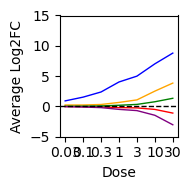

In [26]:
# Set the size of the figure and legend font size
plt.figure(figsize=(2, 2))

# Iterate over each cluster
for i, cluster in enumerate(cluster_means.index):
    # Get the mean values for the current cluster
    cluster_data = cluster_means.loc[cluster]
    
    # Plot a line graph for the current cluster with the custom color
    plt.plot(cluster_data.index.astype(str), cluster_data.values,
             label=f'Cluster {cluster}', color=custom_cmap(i), linewidth=1.0)
    
# Add labels and title
plt.xlabel('Dose')
plt.ylabel('Average Log2FC')
#plt.title('Average Values for Each Time Point by Cluster')
#plt.legend()
plt.grid(False)  # Remove gridlines
plt.ylim(-5, 15)
plt.yticks([-5,-0,5,10, 15])
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.0)

# Adjust layout
plt.tight_layout()

# Export the plot as a PDF
plt.savefig('Figures/Small_RDDR_Cluster_Means_Line_Plot_DE_mRNAs_Mouse.pdf')

# Show the plot
plt.show()
